<a href="https://colab.research.google.com/github/salonigupta1/AudioClassification/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
audio_file_path = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]


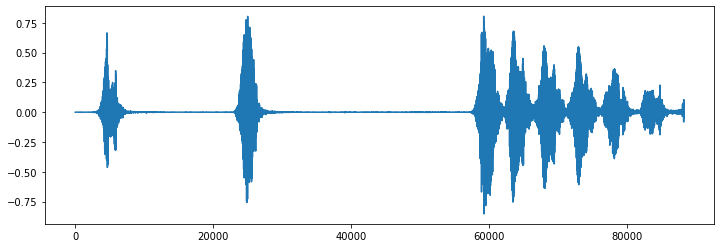

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [5]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [6]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

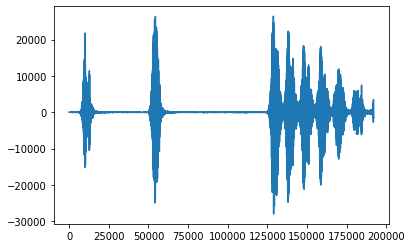

In [7]:
import matplotlib.pyplot as plt
plt.plot(wave_audio)

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [9]:
mfccs

array([[-5.2127631e+02, -5.1920068e+02, -5.1859546e+02, ...,
        -4.3563806e+02, -3.9264105e+02, -3.5284695e+02],
       [ 1.4337622e+01,  1.7177921e+01,  1.8103882e+01, ...,
         1.1375925e+02,  1.5130569e+02,  1.7731265e+02],
       [ 1.3526174e+01,  1.6120741e+01,  1.7259270e+01, ...,
         6.4274483e+01,  6.2837280e+01,  5.8452560e+01],
       ...,
       [ 3.5389400e-01, -3.3235970e+00, -4.8356538e+00, ...,
        -5.2698832e+00, -1.1491921e+00, -1.8506811e+00],
       [ 4.5192480e-01, -3.0670590e+00, -4.6473045e+00, ...,
        -3.4223983e+00,  2.5510237e+00,  1.9448149e+00],
       [ 4.3578243e-01, -2.7977815e+00, -4.4126105e+00, ...,
        -2.6713738e+00,  1.3704147e+00,  5.2174580e-01]], dtype=float32)

In [10]:
import pandas as pd
import os
import librosa

audio_dataset_path = '/content/drive/MyDrive/UrbanSound8K/audio/'
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def feature_extractor(file_name):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

  return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
  final_class_labels = row["class"]
  data = feature_extractor(file_name)
  extracted_features.append([data, final_class_labels])

3555it [23:45,  2.38it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [52:58,  3.30it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [52:59,  3.85it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [55:22,  2.63it/s]


In [14]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [16]:
X = np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
Y = np.array(pd.get_dummies(Y))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
Y_train.shape

(6985, 10)

In [24]:
Y_test.shape

(1747, 10)